# Bank Marketing Prediction

-	%%     1 - age (numeric)
-	%%     2 - job : type of job (categorical: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur”, "student", "blue-collar", "self-employed", "retired", "technician", "services") 
-	%%     3 - marital : marital status (categorical: "married","divorced","single" means divorced or widowed)
-	%%     4 - education (categorical: "unknown","secondary","primary","tertiary")
-	%%     5 - default: has credit in default? (binary: "yes","no")
-	%%     6 - balance: average yearly balance, in euros (numeric) 
-	%%     7 - housing: has housing loan? (binary: "yes","no")
-	%%     8 - loan: has personal loan? (binary: "yes","no")
-	%%     # related with the last contact of the current campaign:
-	%%     9 - contact: contact communication type (categorical: "unknown", "telephone", "cellular") 
-	%%    10 - day: last contact day of the month (numeric)
-	%%    11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
-	%%    12 - duration: last contact duration, in seconds (numeric)
-	%%    13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
-	%%    14 - pdays: number of days that passed by after the client was last contacted from a previous campaign 
-	%%    (numeric, -1 means client was not previously contacted)
-	%%    15 - previous: number of contacts performed before this campaign and for this client (numeric)
-	%%    16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
-	%%    17 - y - has the client subscribed a term deposit? (binary: "yes","no")

 

# 1. Data Exploration
In this part we gain an initial insight into our dataset and get to know the different attributes.

In [1]:
#pip install --upgrade threadpoolctl

In [1]:
# import libarys numpy, pandas, matplot, seaborn 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
from matplotlib import cm 
%matplotlib inline

In [11]:
# load dato into dataframe
names = ["age", "job", "marital", "education", "default", "balance", "housing", "loan",
         "contact", "day", "month", "duration", "campaign", "pdays", "previous", "poutcome", "label"]
df = pd.read_csv("bank_marketing.csv", header=None, names = names)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,label
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,2
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,2
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,2
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,1


In [13]:
#show information of whole dataframe and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  label      45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [14]:
# Determine the dimensions of the dataframe: How many entries and columns does the datafr
def shape(x):
    rows, cols = df.shape
    print(f'The dataframe has {rows} rows and {cols} columns')
shape(df)

The dataframe has 45211 rows and 17 columns


In [15]:
# Summary statistics
df.describe()

,age,balance,day,duration,campaign,pdays,previous,label
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,1.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,1.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,1.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,1.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,1.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,2.000000


In [27]:
df['label'] = df['label'].replace({1: 0, 2: 1})

In [28]:
# Summary statistics for the label
df['label'].describe()

count    45211.000000
mean         0.116985
std          0.321406
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: label, dtype: float64

#### Exploration of numerical values

In [29]:
# create a df with all numerical values
df_num = df.select_dtypes(include=['int64', 'float64'])

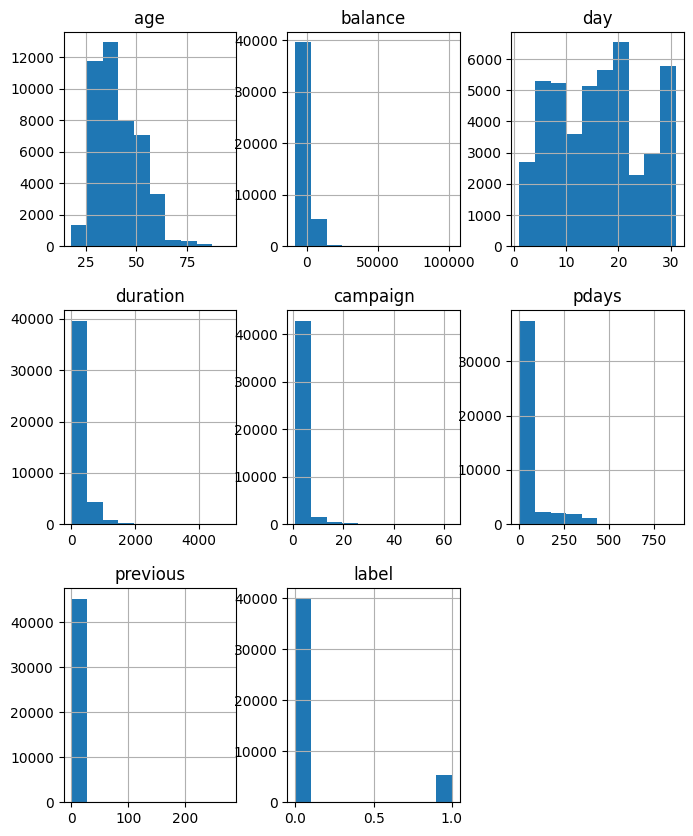

In [30]:
#plot distribution of all numerical attributes in form of histograms
df_num.hist(figsize=[8, 10]);  # the ; hides the output message

<Axes: >

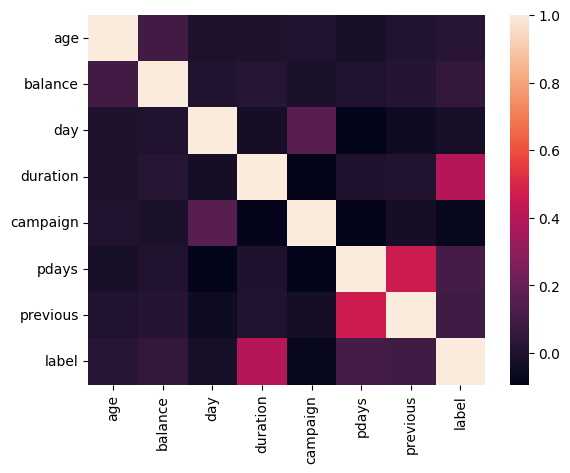

In [31]:
sns.heatmap(df_num.corr()) #heatmap to spot correlations in data

#### Exploration of categorical values

In [32]:
# create a df with all categorical values
df_cat = df.select_dtypes(include=['object'])
df_cat

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown
45208,retired,married,secondary,no,no,no,cellular,nov,success
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown


In [33]:
def get_unique_values(df):
    unique_values = {}
    for column in df:
        unique_count = df[column].nunique()
        
        if pd.api.types.is_numeric_dtype(df[column]) or pd.api.types.is_datetime64_any_dtype(df[column]):
            unique_values[column] = f"Numerische oder Datumsattribute ({unique_count} verschiedene Werte)"
        elif unique_count <= 10:
            unique_values[column] = sorted(df[column].dropna().unique())
        else:
            unique_values[column] = f"Zu viele ({unique_count}) verschiedene Werte für {column}"
    return unique_values

# Beispiel: Annahme, df_cat ist dein DataFrame mit kategorischen Daten
unique_values = get_unique_values(df_cat)

for column, values in unique_values.items():
    print("--")
    print(f"Unique Values in '{column}':")
    print(values)


--
Unique Values in 'job':
Zu viele (12) verschiedene Werte für job
--
Unique Values in 'marital':
['divorced', 'married', 'single']
--
Unique Values in 'education':
['primary', 'secondary', 'tertiary', 'unknown']
--
Unique Values in 'default':
['no', 'yes']
--
Unique Values in 'housing':
['no', 'yes']
--
Unique Values in 'loan':
['no', 'yes']
--
Unique Values in 'contact':
['cellular', 'telephone', 'unknown']
--
Unique Values in 'month':
Zu viele (12) verschiedene Werte für month
--
Unique Values in 'poutcome':
['failure', 'other', 'success', 'unknown']


# 2. Data Cleansing

The goal of this part is to detect and correct or remove invalid/ erroneous data.

In [35]:
print(df.duplicated())  #check whether duplicates exist in the data

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool


#### Check for NaN

In [36]:
sum(df.isnull().any(axis=1))

0

#### Delete irrelevant columns

In [42]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,label
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [43]:
df_new = df.copy()

# 3. Data Transformation
To ensure data compatibility and change the representation to a machine processable form we will now continue with data transformation.
The goal is better generalizability and processability of the machine learning model.

## 3.1 Label Encoding

In [44]:
# multilabelencoder transofrm categorical data into numeric

from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() #Initalization as shortcut 'le'

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = le.fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = le.fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [45]:
# transform all columns with string values
df_encoded = MultiColumnLabelEncoder([col for col in df_new.columns if df_new[col].dtype == 'object']).fit_transform(df_new)
df_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,label
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


## 3.2 Scaling
We use the MinMaxScaler to scale attributes with different intervals for normalisation. 
This helps to avoid model manipulation.


In [46]:
# MinMaxScaler without in Calculation
df_min_max_scaled = df_encoded.copy()

# Iteriere durch die Spalten des DataFrames df_num
for column in df_min_max_scaled.columns:
    if df_min_max_scaled[column].dtype in ['int64', 'float64']:
        if column == 'is_claim': # hiermit wird die target variable nicht gescaled
            continue 
        else:
            #formular from page p. 139 ML-book
            df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())
    else:
        continue

display(df_min_max_scaled)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,label
0,0.519481,0.363636,0.5,0.666667,0.0,0.092259,1.0,0.0,1.0,0.133333,0.727273,0.053070,0.000000,0.000000,0.000000,1.000000,0.0
1,0.337662,0.818182,1.0,0.333333,0.0,0.073067,1.0,0.0,1.0,0.133333,0.727273,0.030704,0.000000,0.000000,0.000000,1.000000,0.0
2,0.194805,0.181818,0.5,0.333333,0.0,0.072822,1.0,1.0,1.0,0.133333,0.727273,0.015453,0.000000,0.000000,0.000000,1.000000,0.0
3,0.376623,0.090909,0.5,1.000000,0.0,0.086476,1.0,0.0,1.0,0.133333,0.727273,0.018707,0.000000,0.000000,0.000000,1.000000,0.0
4,0.194805,1.000000,1.0,1.000000,0.0,0.072812,0.0,0.0,1.0,0.133333,0.727273,0.040260,0.000000,0.000000,0.000000,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0.818182,0.5,0.666667,0.0,0.080293,0.0,0.0,0.0,0.533333,0.818182,0.198658,0.032258,0.000000,0.000000,1.000000,1.0
45207,0.688312,0.454545,0.0,0.000000,0.0,0.088501,0.0,0.0,0.0,0.533333,0.818182,0.092721,0.016129,0.000000,0.000000,1.000000,1.0
45208,0.701299,0.454545,0.5,0.333333,0.0,0.124689,0.0,0.0,0.0,0.533333,0.818182,0.229158,0.064516,0.212156,0.010909,0.666667,1.0
45209,0.506494,0.090909,0.5,0.333333,0.0,0.078868,0.0,0.0,0.5,0.533333,0.818182,0.103294,0.048387,0.000000,0.000000,1.000000,0.0


## 3.3 Discretization
Not used

# 4. k-means Clustering

We will now continue to do the k-means clustering based on the newly cleaned and transformed dataset. We use the data set advertising_data_transformed.csv without the discretized age variable.

In [47]:
df_scaled = df_min_max_scaled.copy()
df_scaled

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,label
0,0.519481,0.363636,0.5,0.666667,0.0,0.092259,1.0,0.0,1.0,0.133333,0.727273,0.053070,0.000000,0.000000,0.000000,1.000000,0.0
1,0.337662,0.818182,1.0,0.333333,0.0,0.073067,1.0,0.0,1.0,0.133333,0.727273,0.030704,0.000000,0.000000,0.000000,1.000000,0.0
2,0.194805,0.181818,0.5,0.333333,0.0,0.072822,1.0,1.0,1.0,0.133333,0.727273,0.015453,0.000000,0.000000,0.000000,1.000000,0.0
3,0.376623,0.090909,0.5,1.000000,0.0,0.086476,1.0,0.0,1.0,0.133333,0.727273,0.018707,0.000000,0.000000,0.000000,1.000000,0.0
4,0.194805,1.000000,1.0,1.000000,0.0,0.072812,0.0,0.0,1.0,0.133333,0.727273,0.040260,0.000000,0.000000,0.000000,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0.818182,0.5,0.666667,0.0,0.080293,0.0,0.0,0.0,0.533333,0.818182,0.198658,0.032258,0.000000,0.000000,1.000000,1.0
45207,0.688312,0.454545,0.0,0.000000,0.0,0.088501,0.0,0.0,0.0,0.533333,0.818182,0.092721,0.016129,0.000000,0.000000,1.000000,1.0
45208,0.701299,0.454545,0.5,0.333333,0.0,0.124689,0.0,0.0,0.0,0.533333,0.818182,0.229158,0.064516,0.212156,0.010909,0.666667,1.0
45209,0.506494,0.090909,0.5,0.333333,0.0,0.078868,0.0,0.0,0.5,0.533333,0.818182,0.103294,0.048387,0.000000,0.000000,1.000000,0.0


In [48]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  float64
 2   marital    45211 non-null  float64
 3   education  45211 non-null  float64
 4   default    45211 non-null  float64
 5   balance    45211 non-null  float64
 6   housing    45211 non-null  float64
 7   loan       45211 non-null  float64
 8   contact    45211 non-null  float64
 9   day        45211 non-null  float64
 10  month      45211 non-null  float64
 11  duration   45211 non-null  float64
 12  campaign   45211 non-null  float64
 13  pdays      45211 non-null  float64
 14  previous   45211 non-null  float64
 15  poutcome   45211 non-null  float64
 16  label      45211 non-null  float64
dtypes: float64(17)
memory usage: 5.9 MB


In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.85) # use these 85% in the assignment as well
pcadf = pca.fit_transform(df_scaled)
k = pca.n_components_
pca.n_components_ # put out number of dimensions 

8

In [50]:
# we need a dimension of 2 if we want to visualize the data
# set PCA to 2

pca = PCA(2)
pcadf_fix2 = pca.fit_transform(df_scaled)
pcadf_fix2 = pd.DataFrame(pcadf_fix2, columns=["PC"+str(i) for i in range (1, pcadf_fix2.shape[1]+1)])
pcadf_fix2

,PC1,PC2
0,-0.770181,-0.322293
1,-0.734101,-0.311661
2,-0.876460,-0.263135
3,-0.779010,-0.301985
4,0.108000,-0.836377
...,...,...
45206,0.739042,-0.135397
45207,0.633684,-0.177937
45208,0.699178,0.026231
45209,0.198317,-0.545908


In [51]:
Y = pcadf_fix2.values # store results in a variable

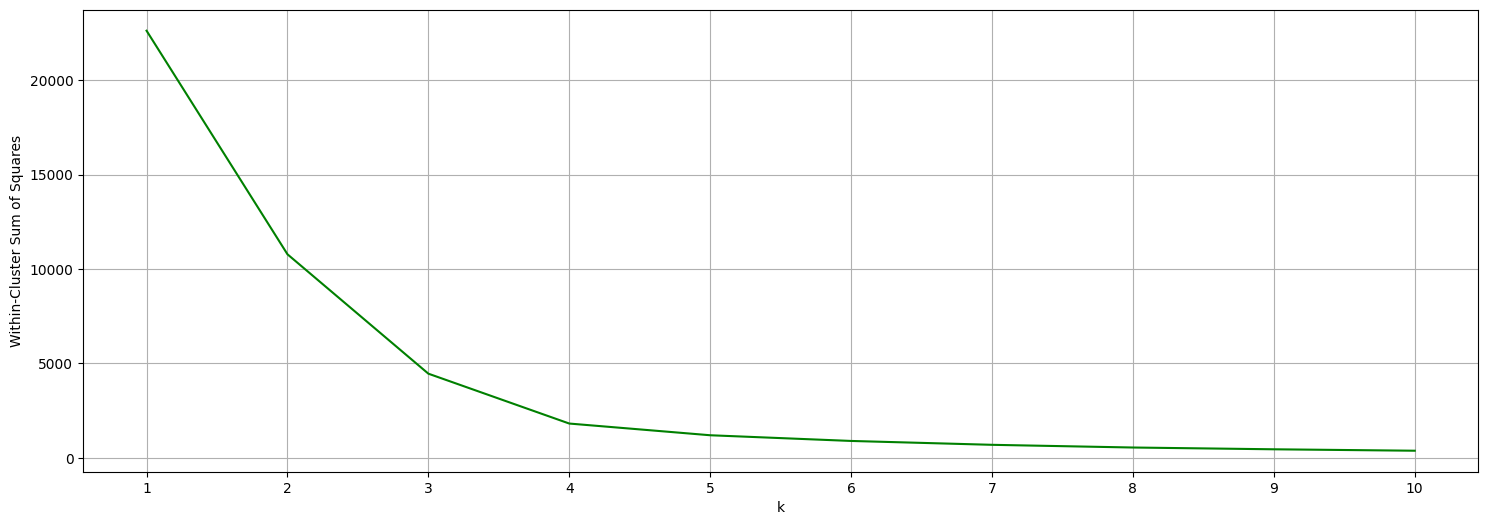

In [52]:
# Ignore future warnings 
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia_score = []

for k in range (1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Y)
    inertia_score.append(kmeans.inertia_)

# Visualize
plt.figure(figsize=(18,6))
sns.lineplot(x=range(1,11), y=inertia_score, color="green")
plt.xticks(range(1,11))
plt.xlabel("k")
plt.ylabel("Within-Cluster Sum of Squares")
plt.grid()
plt.show()

The Elbow Plot recommends 3 clusters, as increasing the number of clusters further does not generate a significant decrease in heterogeneity.

In [53]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
# random_state shuffles the data, 42 is gernerally used to randomize data
kmeans.fit(Y)

KMeans(n_clusters=3, random_state=42)

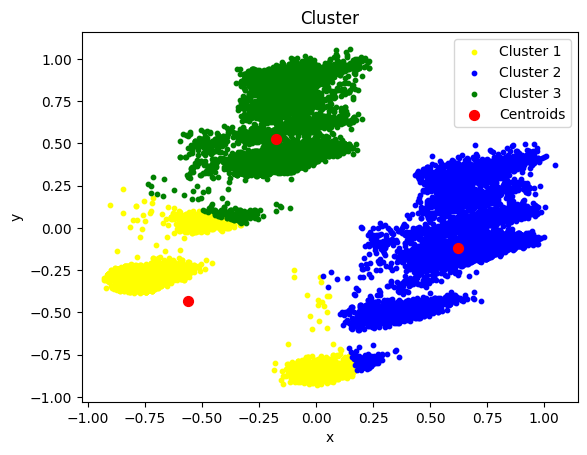

In [54]:
m_kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = m_kmeans.fit_predict(Y)

# Plotting the clusters
colors = ["yellow", "blue", "green"]  # Define colors for each cluster

for cluster_num in range(3):
    plt.scatter(Y[y_kmeans == cluster_num, 0], Y[y_kmeans == cluster_num, 1],
                s=10, c=colors[cluster_num], label="Cluster {}".format(cluster_num + 1))

# Plotting the centroids
plt.scatter(m_kmeans.cluster_centers_[:, 0], m_kmeans.cluster_centers_[:, 1],
            s=50, c="red", label="Centroids")

plt.title("Cluster")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5485620326099271
For n_clusters = 3 The average silhouette_score is : 0.6687637198357967
For n_clusters = 4 The average silhouette_score is : 0.7472121102513581
For n_clusters = 5 The average silhouette_score is : 0.7269800098162529
For n_clusters = 6 The average silhouette_score is : 0.6798292531503117


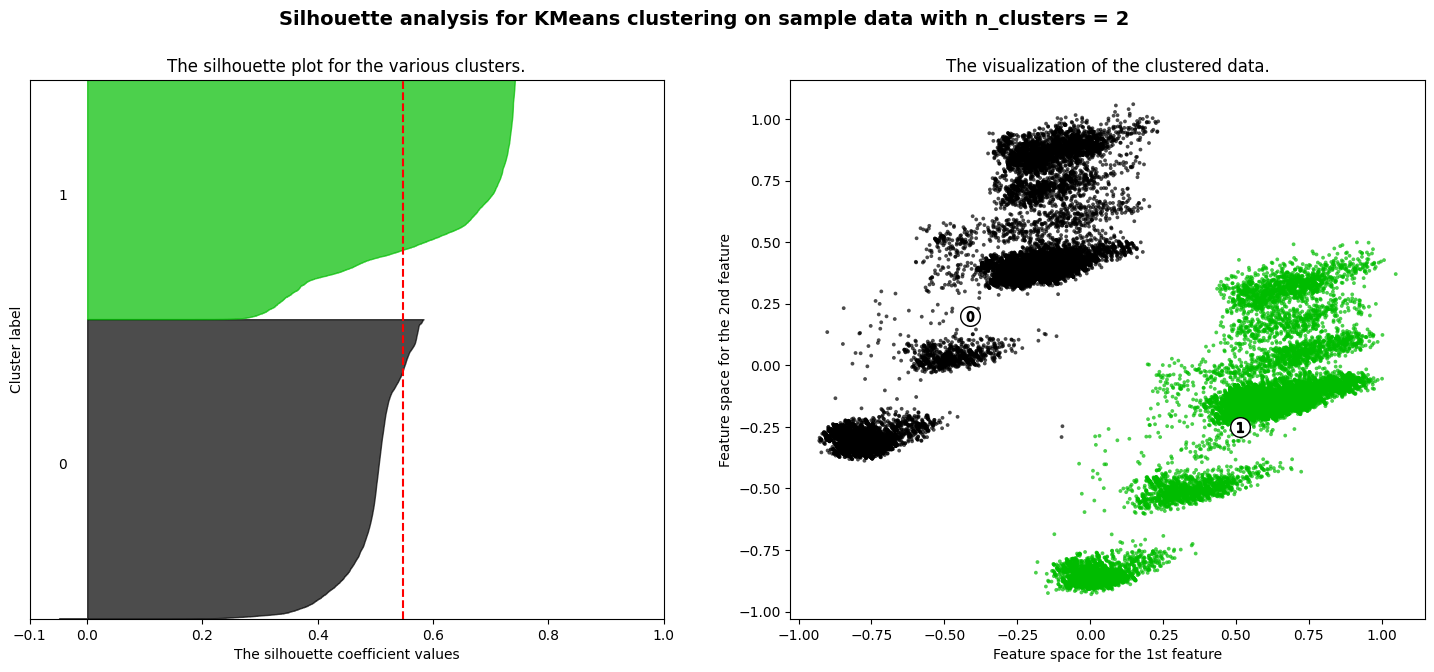

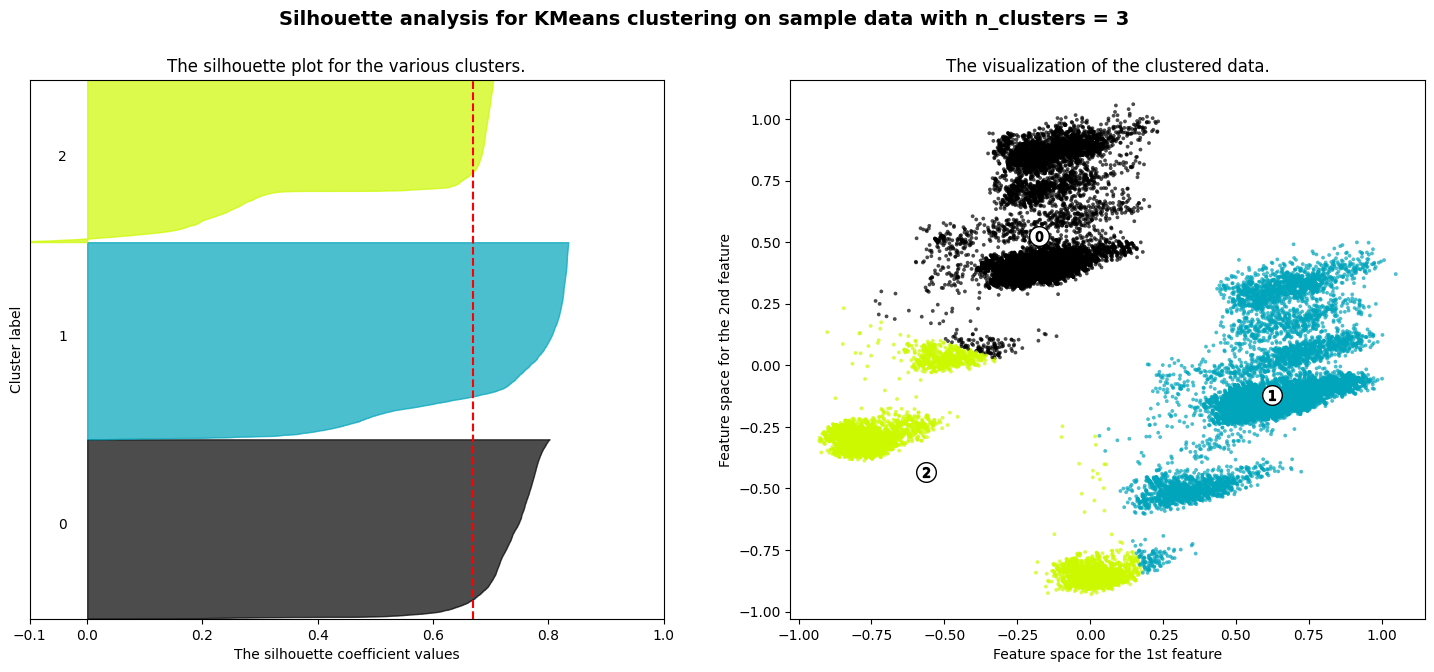

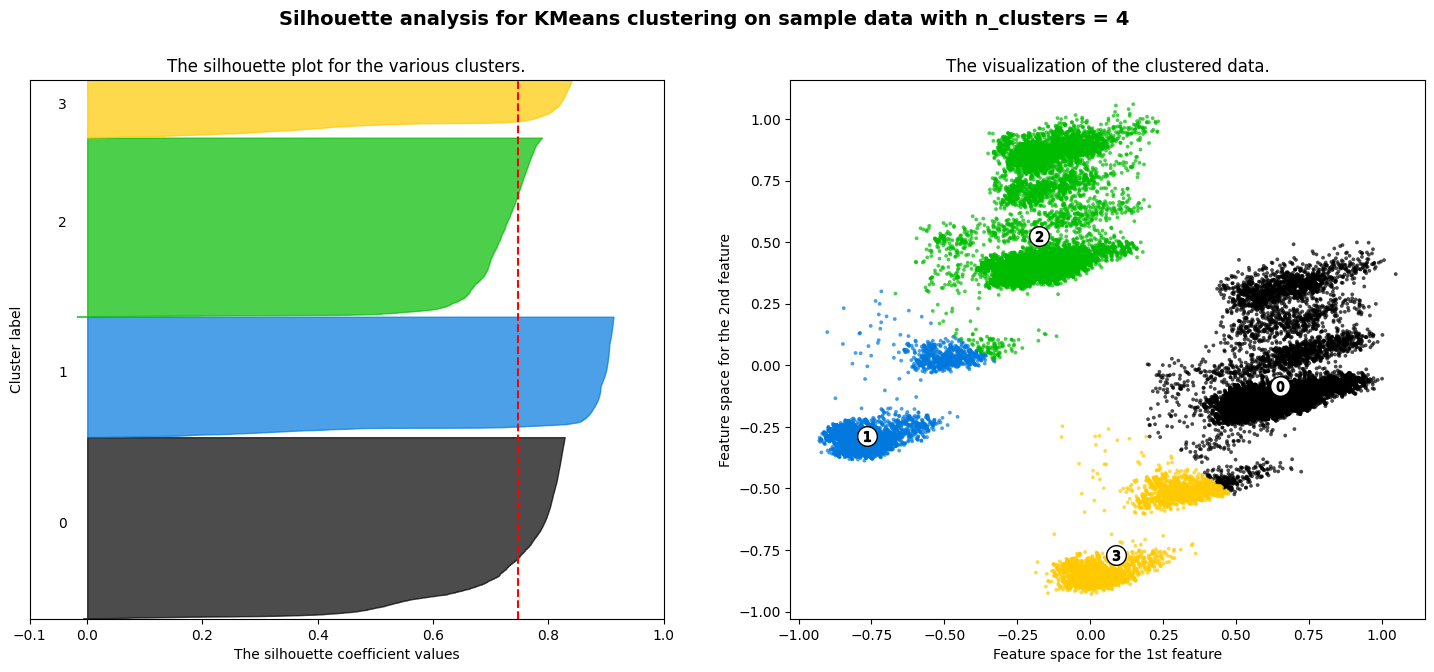

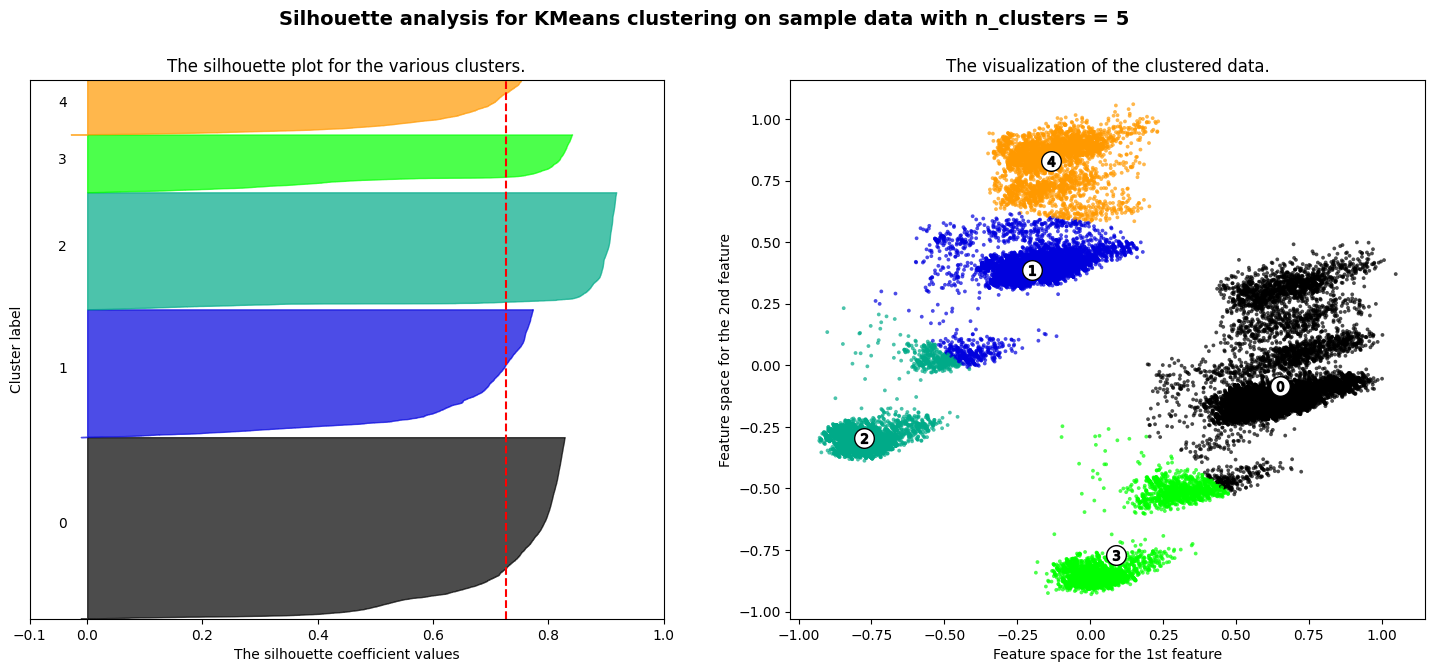

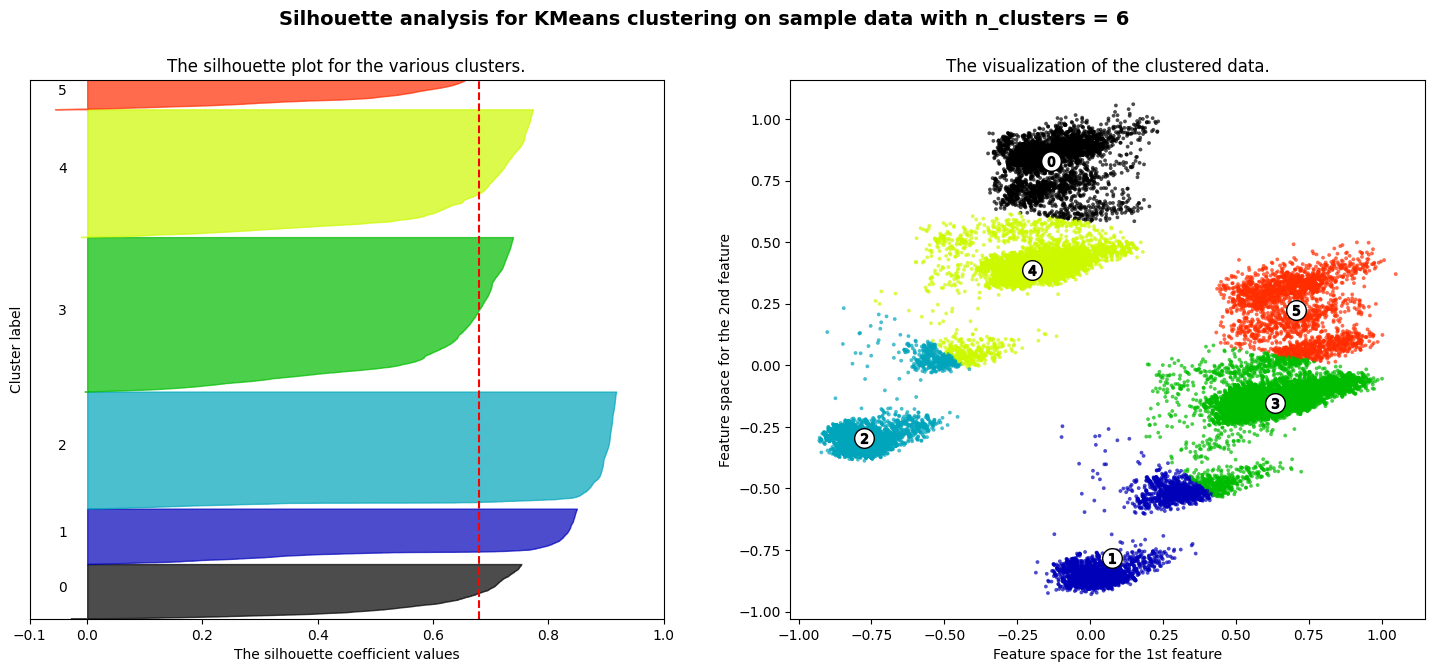

In [55]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(Y) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(Y)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Y, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Y, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Y[:, 0], Y[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [56]:
m_kmeans = KMeans(n_clusters = 4, random_state = 10)
y_kmeans = m_kmeans.fit_predict(Y)

In [57]:
# which rows have been assigned to which clusters?

data = pd.DataFrame(Y, columns=["PC"+str(i) for i in range (1,pcadf_fix2.shape[1]+1)])
y_kmean = pd.DataFrame(y_kmeans)
data["Cluster Labels"] = y_kmeans
data

,PC1,PC2,Cluster Labels
0,-0.770181,-0.322293,1
1,-0.734101,-0.311661,1
2,-0.876460,-0.263135,1
3,-0.779010,-0.301985,1
4,0.108000,-0.836377,3
...,...,...,...
45206,0.739042,-0.135397,0
45207,0.633684,-0.177937,0
45208,0.699178,0.026231,0
45209,0.198317,-0.545908,3


In [58]:
# extract column Cluster Label and add it to the dafa frame
df_cluster = df_scaled.merge(data["Cluster Labels"], left_index=True, right_index=True)
df_cluster

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,label,Cluster Labels
0,0.519481,0.363636,0.5,0.666667,0.0,0.092259,1.0,0.0,1.0,0.133333,0.727273,0.053070,0.000000,0.000000,0.000000,1.000000,0.0,1
1,0.337662,0.818182,1.0,0.333333,0.0,0.073067,1.0,0.0,1.0,0.133333,0.727273,0.030704,0.000000,0.000000,0.000000,1.000000,0.0,1
2,0.194805,0.181818,0.5,0.333333,0.0,0.072822,1.0,1.0,1.0,0.133333,0.727273,0.015453,0.000000,0.000000,0.000000,1.000000,0.0,1
3,0.376623,0.090909,0.5,1.000000,0.0,0.086476,1.0,0.0,1.0,0.133333,0.727273,0.018707,0.000000,0.000000,0.000000,1.000000,0.0,1
4,0.194805,1.000000,1.0,1.000000,0.0,0.072812,0.0,0.0,1.0,0.133333,0.727273,0.040260,0.000000,0.000000,0.000000,1.000000,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0.818182,0.5,0.666667,0.0,0.080293,0.0,0.0,0.0,0.533333,0.818182,0.198658,0.032258,0.000000,0.000000,1.000000,1.0,0
45207,0.688312,0.454545,0.0,0.000000,0.0,0.088501,0.0,0.0,0.0,0.533333,0.818182,0.092721,0.016129,0.000000,0.000000,1.000000,1.0,0
45208,0.701299,0.454545,0.5,0.333333,0.0,0.124689,0.0,0.0,0.0,0.533333,0.818182,0.229158,0.064516,0.212156,0.010909,0.666667,1.0,0
45209,0.506494,0.090909,0.5,0.333333,0.0,0.078868,0.0,0.0,0.5,0.533333,0.818182,0.103294,0.048387,0.000000,0.000000,1.000000,0.0,3


# 5. Decision Tree

In [59]:
#import transformed data set into new df
df_transLab = df_scaled.copy()
df_transLab

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,label
0,0.519481,0.363636,0.5,0.666667,0.0,0.092259,1.0,0.0,1.0,0.133333,0.727273,0.053070,0.000000,0.000000,0.000000,1.000000,0.0
1,0.337662,0.818182,1.0,0.333333,0.0,0.073067,1.0,0.0,1.0,0.133333,0.727273,0.030704,0.000000,0.000000,0.000000,1.000000,0.0
2,0.194805,0.181818,0.5,0.333333,0.0,0.072822,1.0,1.0,1.0,0.133333,0.727273,0.015453,0.000000,0.000000,0.000000,1.000000,0.0
3,0.376623,0.090909,0.5,1.000000,0.0,0.086476,1.0,0.0,1.0,0.133333,0.727273,0.018707,0.000000,0.000000,0.000000,1.000000,0.0
4,0.194805,1.000000,1.0,1.000000,0.0,0.072812,0.0,0.0,1.0,0.133333,0.727273,0.040260,0.000000,0.000000,0.000000,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0.818182,0.5,0.666667,0.0,0.080293,0.0,0.0,0.0,0.533333,0.818182,0.198658,0.032258,0.000000,0.000000,1.000000,1.0
45207,0.688312,0.454545,0.0,0.000000,0.0,0.088501,0.0,0.0,0.0,0.533333,0.818182,0.092721,0.016129,0.000000,0.000000,1.000000,1.0
45208,0.701299,0.454545,0.5,0.333333,0.0,0.124689,0.0,0.0,0.0,0.533333,0.818182,0.229158,0.064516,0.212156,0.010909,0.666667,1.0
45209,0.506494,0.090909,0.5,0.333333,0.0,0.078868,0.0,0.0,0.5,0.533333,0.818182,0.103294,0.048387,0.000000,0.000000,1.000000,0.0


###  Definition of training data and target data (label)

In [60]:
# Setting the target variable
X = df_transLab.iloc[:, :-1] #.join(df_transLab.iloc[:, -2:]) wenn label nicht in de letzten spalte ist
Y = df_transLab.iloc[:, -1] # as target variable (label)

In [61]:
X # as input variables (training data)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.519481,0.363636,0.5,0.666667,0.0,0.092259,1.0,0.0,1.0,0.133333,0.727273,0.053070,0.000000,0.000000,0.000000,1.000000
1,0.337662,0.818182,1.0,0.333333,0.0,0.073067,1.0,0.0,1.0,0.133333,0.727273,0.030704,0.000000,0.000000,0.000000,1.000000
2,0.194805,0.181818,0.5,0.333333,0.0,0.072822,1.0,1.0,1.0,0.133333,0.727273,0.015453,0.000000,0.000000,0.000000,1.000000
3,0.376623,0.090909,0.5,1.000000,0.0,0.086476,1.0,0.0,1.0,0.133333,0.727273,0.018707,0.000000,0.000000,0.000000,1.000000
4,0.194805,1.000000,1.0,1.000000,0.0,0.072812,0.0,0.0,1.0,0.133333,0.727273,0.040260,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0.818182,0.5,0.666667,0.0,0.080293,0.0,0.0,0.0,0.533333,0.818182,0.198658,0.032258,0.000000,0.000000,1.000000
45207,0.688312,0.454545,0.0,0.000000,0.0,0.088501,0.0,0.0,0.0,0.533333,0.818182,0.092721,0.016129,0.000000,0.000000,1.000000
45208,0.701299,0.454545,0.5,0.333333,0.0,0.124689,0.0,0.0,0.0,0.533333,0.818182,0.229158,0.064516,0.212156,0.010909,0.666667
45209,0.506494,0.090909,0.5,0.333333,0.0,0.078868,0.0,0.0,0.5,0.533333,0.818182,0.103294,0.048387,0.000000,0.000000,1.000000


In [62]:
Y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
45206    1.0
45207    1.0
45208    1.0
45209    0.0
45210    0.0
Name: label, Length: 45211, dtype: float64

In [64]:
Y.value_counts()

label
0.0    39922
1.0     5289
Name: count, dtype: int64

### 30-70 Split-validation

We split the data into 2/3 training data and 1/3 test data.

In [65]:
# Generate training and testing set (example for split validation)
# X as training data and Y as label is splitted

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.33, random_state=42)

In [66]:
# check the split sets: proportion 1/3 test to 2/3 training
X_train.shape, X_test.shape

((30291, 16), (14920, 16))

In [67]:
# Decision Tree with Gini Index criterion
# instantiate the DT classifier at dt_gini

from sklearn.tree import DecisionTreeClassifier

# Parameters
dt_gini = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=3,
                                min_samples_split=2, min_samples_leaf=1, random_state=42)

dt_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [68]:
# Predict the Test set results with criterion gini index
Y_pred_gini = dt_gini.predict(X_test)

In [69]:
# Comparison of predicted labels y_ped_gini and real test-labels y_test

from sklearn.metrics import accuracy_score

print('The model accuracy with gini index is: {0:0.4f}'.format(accuracy_score(Y_test, Y_pred_gini)))

The model accuracy with gini index is: 0.8879


In [70]:
# Overfitting potential check 
# compare traning to test performance --> indicator for overfitting

print('The accuracy score of the decision tree model is: {0:0.4f}'.format(dt_gini.score(X_train, Y_train)))

The accuracy score of the decision tree model is: 0.8927


- compare accuracy scores
- good accuracy? overfitting? etc?

### Visualisaiton of the gini-based decision tree

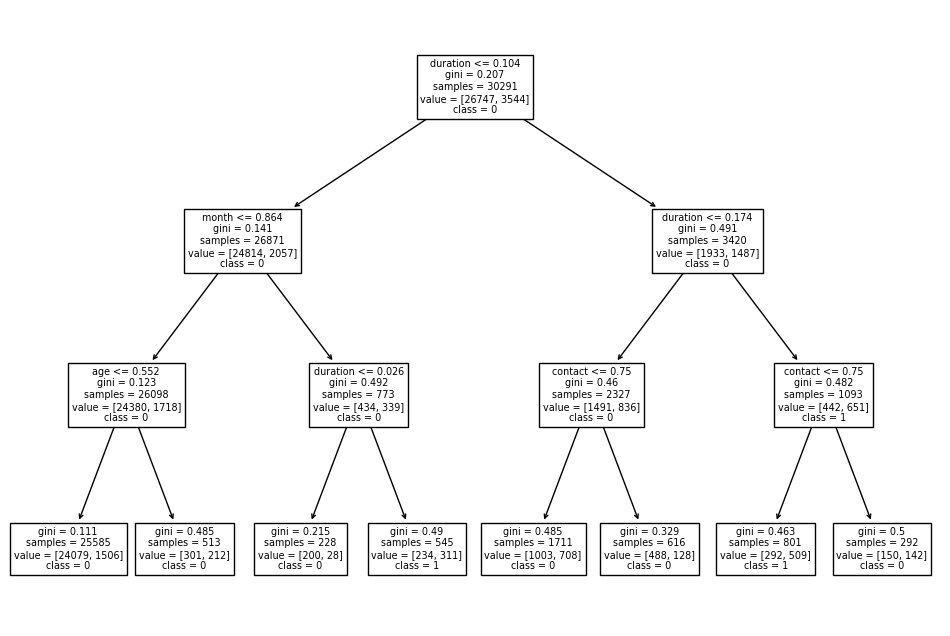

In [71]:
# Visualisaiton of the gini-based decision tree

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(dt_gini.fit(X_train, Y_train), 
               feature_names=[col for col in df_transLab.columns],
               class_names=["0", "1"]);

### Confusion Matrix 

Text(0.5, 1.0, 'Confusion Matrix')

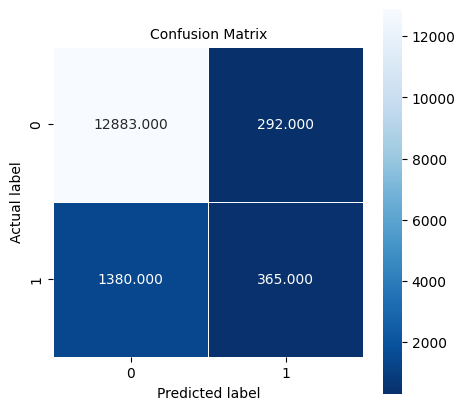

In [72]:
# Displaying the confusion matrix

import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

confusion_matrix =metrics.confusion_matrix(Y_test, Y_pred_gini)

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = "Blues_r")

plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix", size=10)

### Classification report
Precision: The proportion of the data classified as positive that actually is positive. It represents the accuracy of positive predictions.

Recall: The relative proportion of correctly classified positive data out of all the actual positive data. It represents the ability of the model to correctly identify positive instances.

F1-Score: The harmonic mean of precision and recall.

In [73]:
#Classification report

from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred_gini))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94     13175
         1.0       0.56      0.21      0.30      1745

    accuracy                           0.89     14920
   macro avg       0.73      0.59      0.62     14920
weighted avg       0.86      0.89      0.86     14920



### Cross-Validation

Testing by cross-validation is needed to avoid overfitting.

Model is trained and tested on a new data composition in each rotation. We use k=10 and check whether there is a variation inbetween the k-folds.

In [74]:
# Libraries for cross validation
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import tree

# 10-fold cross validation
kf= KFold(n_splits=10, shuffle=True, random_state=42)

cnt = 1

# Gerneration of folds
for train_index, test_index in kf.split(X, Y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set: {len(test_index)}')
    cnt += 1

Fold:1, Train set: 40689, Test set: 4522
Fold:2, Train set: 40690, Test set: 4521
Fold:3, Train set: 40690, Test set: 4521
Fold:4, Train set: 40690, Test set: 4521
Fold:5, Train set: 40690, Test set: 4521
Fold:6, Train set: 40690, Test set: 4521
Fold:7, Train set: 40690, Test set: 4521
Fold:8, Train set: 40690, Test set: 4521
Fold:9, Train set: 40690, Test set: 4521
Fold:10, Train set: 40690, Test set: 4521


In [75]:
# Check Overfitting via Cross-Validation

# store respective scores of each crossvalidation variation 
score= cross_val_score(tree.DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=3,
                                                      min_samples_split=2, min_samples_leaf=1,
                                                      random_state=42), X, Y, cv=kf, scoring="accuracy")
print(f'Accuracy scores for each fold are: {score}')
print(f'Average accuracy score: {"{:.4f}".format(score.mean())}')

Accuracy scores for each fold are: [0.88345865 0.88852024 0.89205928 0.88962619 0.88852024 0.8849812
 0.89360761 0.89360761 0.89404999 0.89427118]
Average accuracy score: 0.8903


### Parameter Optimisations


In [76]:
# Parameter Optimisations

# prediction accuracy can be elevated by using different depths
max_depth=[2,3,4,5,6,7,8]
for val in max_depth:
    score= cross_val_score(tree.DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=val,
                                                      min_samples_split=2, min_samples_leaf=1,
                                                      random_state=42), X, Y, cv=kf, scoring="accuracy")
    print(score.mean())

0.8884122216623178
0.8902702176808976
0.8935216666906346
0.8964633127375212
0.900975525194187
0.899515788573663
0.9002898557530091


### DT-Generation without pre-set parameters
The decision tree without pre-set parameters has a complex structure, no interpretability, misses generalizability and brings the risk of overfitting.

In [77]:
# dt_noparam is the tree without pre-set parameters
dt_noparam = DecisionTreeClassifier(criterion='gini', splitter = 'best', random_state = 0)
dt_noparam.fit(X_train, Y_train)

# Predict the Test set results with criterion gini indes
Y_pred = dt_noparam.predict(X_test)

print('The model accuracy with gini index is: {0:0.4f}'.format(accuracy_score(Y_test, Y_pred)))

The model accuracy with gini index is: 0.8763


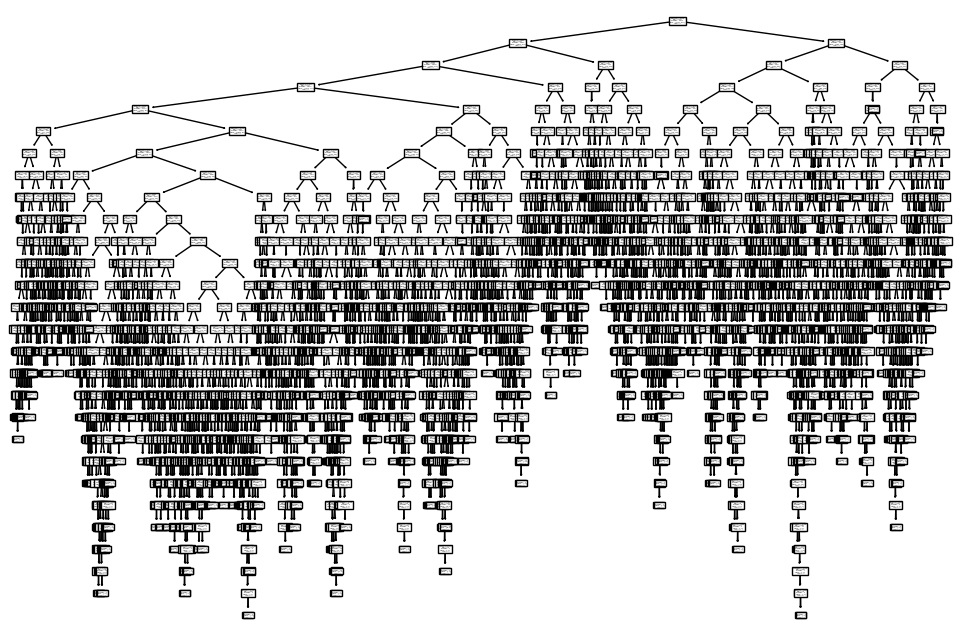

In [78]:
# Visualize the decision tree without pre-set parameters
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(dt_noparam.fit(X_train, Y_train), 
               feature_names=[col for col in df_transLab.columns], class_names=["0", "1"])

plt.show()

### Pruning (Forward Pruning)

Pruning is a process of selectively removing certain parts of a tree, such as branches, to improve the structure of the tree and promote good growth.
We adopt pruning to our desicion tree to avoid overfitting.

In [79]:
# Pruning Application

# we limit the growth of the tree by setting contraints for control variables and use GridSearch for pre-pruning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# defines params containing different combinations of the parameters
params= {"max_depth":[2,3,4,5,6,7], "min_samples_split" : [2,3,4], "min_samples_leaf":[1,2]}

# tree to be tuned without parameters
clf= tree.DecisionTreeClassifier()

# search for the best parameter constellation
gcv=GridSearchCV(estimator=clf, param_grid=params)
gcv.fit(X_train, Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [80]:
# recommended constellation of parameters
gcv.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 4}

Test score: 0.8975871313672922


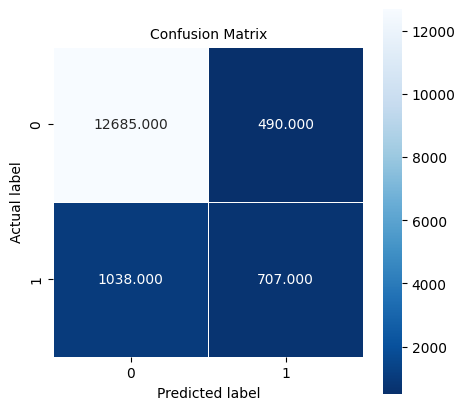

In [81]:
# calculate performance score again  with results from above --> trained model with optimized parameters?
model= gcv.best_estimator_
model.fit(X_train, Y_train)

# use test data set
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

confusion_matrix = metrics.confusion_matrix(Y_test, Y_test_pred)

# use confusion matrix from above to see model performance
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = "Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix", size=10)

# accuracy score 
print(f'Test score: {accuracy_score(Y_test, Y_test_pred )}')

### Visualisation of the pruned decision tree

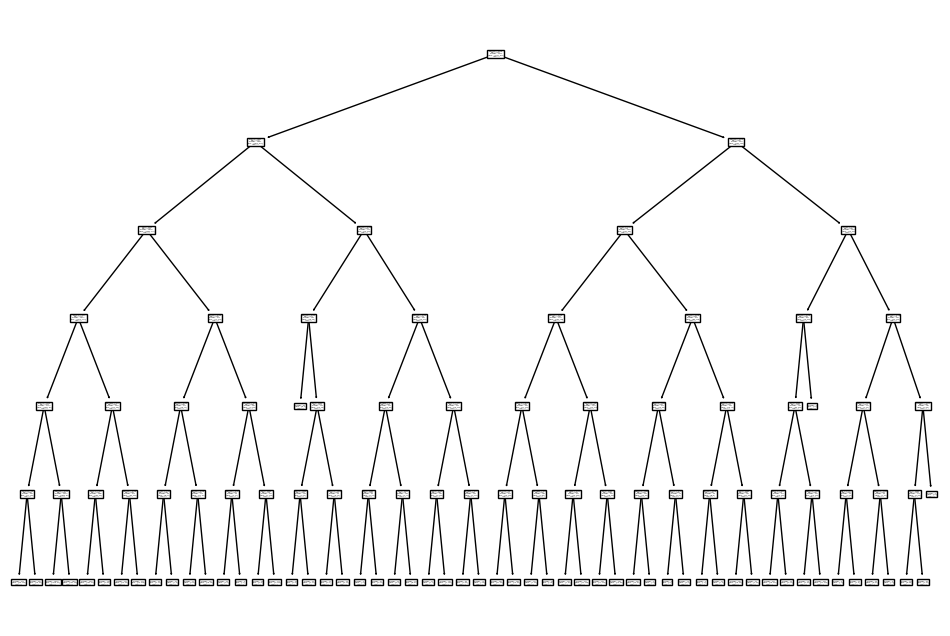

In [82]:
# Visualisation of the pruned decision tree

# vizualize as desicion tree using new "model" instead of dt_gini.fit(X_train, Y_train) from above
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(model, feature_names=[col for col in df_transLab.columns],
               class_names=["0", "1"])

# result is an optimized desicion tree
plt.show()

In [83]:
# Visualtisation of the decision rules as text

text_representation= tree.export_text(model, feature_names=[col for col in df_transLab.columns[:-1]])



print(text_representation)

|--- duration <= 0.10
|   |--- month <= 0.86
|   |   |--- age <= 0.55
|   |   |   |--- pdays <= 0.01
|   |   |   |   |--- month <= 0.05
|   |   |   |   |   |--- housing <= 0.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- housing >  0.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- month >  0.05
|   |   |   |   |   |--- duration <= 0.07
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- duration >  0.07
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |--- pdays >  0.01
|   |   |   |   |--- poutcome <= 0.50
|   |   |   |   |   |--- pdays <= 0.43
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- pdays >  0.43
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- poutcome >  0.50
|   |   |   |   |   |--- duration <= 0.03
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- duration >  0.03
|   |   |   |   |   |   |--- class: 1.0
|   |   |--- age >  0.55
|   |   |   |--- duration <= 0.05
|   |   |   |  

### Classification report

In [84]:
#Classification report

from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94     13175
         1.0       0.59      0.41      0.48      1745

    accuracy                           0.90     14920
   macro avg       0.76      0.68      0.71     14920
weighted avg       0.89      0.90      0.89     14920

